In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(), 
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(), 
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(), 
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
       ] 

import warnings
warnings.filterwarnings('ignore')

## Read training data

In [3]:
df = pd.read_csv('E:/Experiments/YulanPeng/Wenwen/OSDFS/2OS-train.csv',encoding='gbk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Columns: 159 entries, ID to original_ngtdm_Strength
dtypes: float64(102), int64(56), object(1)
memory usage: 443.6+ KB


In [4]:
df.head()

,ID,patient,2yOS,cli01,cli02,cli03,cli04,cli05,cli06,cli07,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,3,SICK0000053,1,1,41,2,1,0,2,3,...,0.005932,0.004502,0.892413,634.309034,0.004174,0.025478,0.034650,1651.539734,0.111554,35.270325
1,19,SICK0006140,0,1,40,1,1,0,1,0,...,0.013557,0.008920,0.851541,793.356047,0.008007,0.013646,0.044393,2273.786349,0.092157,92.240806
2,25,SICK0007137,1,1,39,1,1,0,2,1,...,0.014492,0.006806,0.890508,818.959013,0.004908,0.022152,0.026248,2910.847233,0.107077,60.080551
3,26,SICK0007154,1,2,45,2,1,0,2,1,...,0.002476,0.001838,0.822249,1366.279301,0.001703,0.020552,0.039183,628.267495,0.086383,26.964163
4,27,SICK0007192,1,1,55,2,1,0,2,0,...,0.038111,0.017261,0.845525,763.166227,0.012497,0.017526,0.050475,1352.372555,0.118779,60.753588


In [5]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['2yOS']))}
class_mapping

{0: 0, 1: 1}

In [6]:
from sklearn.preprocessing import LabelEncoder
df['2yOS'] = df['2yOS'].map(class_mapping)
y_train = LabelEncoder().fit_transform(df['2yOS'].values)
X0_train = df.iloc[:, 3:56].values
X1_train = df.iloc[:, 56:159].values
print(y_train.shape)
print(X0_train.shape)
print(X1_train.shape)

(357,)
(357, 53)
(357, 103)


In [7]:
feat_labels0 = df.columns[3:56] 
feat_labels1 = df.columns[56:159] 

## Read test data

In [8]:
df1 = pd.read_csv('E:/Experiments/YulanPeng/Wenwen/OSDFS/2OS-test.csv',encoding='gbk')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['2yOS']))}
df1['2yOS'] = df1['2yOS'].map(class_mapping)
y_test = LabelEncoder().fit_transform(df1['2yOS'].values)
X0_test = df1.iloc[:, 3:56].values
X1_test = df1.iloc[:, 56:159].values
print(y_test.shape)
print(X0_test.shape)
print(X1_test.shape)

(40,)
(40, 53)
(40, 103)


In [9]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X0_std = stdsc.fit_transform(X0_train)
X0_train = X0_std
X0_test = stdsc.transform(X0_test)
print(X0_train.shape)
print(X0_test.shape)

(357, 53)
(40, 53)


In [10]:
stdsc = StandardScaler()
X1_std = stdsc.fit_transform(X1_train)
X1_train = X1_std
X1_test = stdsc.transform(X1_test)
print(X1_train.shape)
print(X1_test.shape)

(357, 103)
(40, 103)


1    327
0     30
Name: 2yOS, dtype: int64


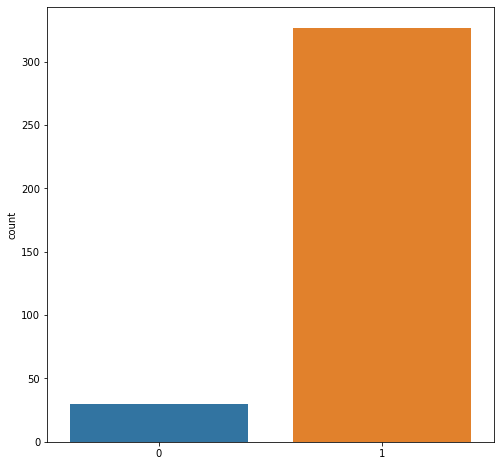

In [11]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
ax = sns.countplot(x=y_train, data=df) 
print(df['2yOS'].value_counts())

1    28
0    12
Name: 2yOS, dtype: int64


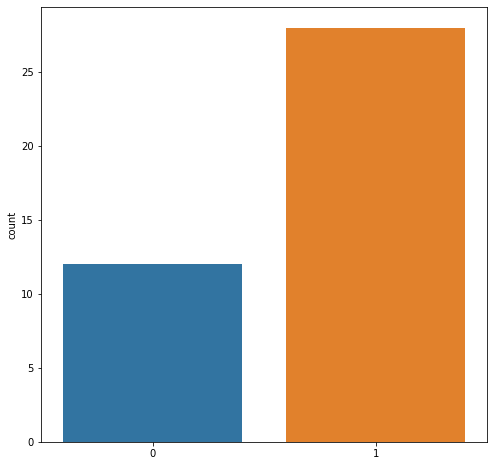

In [12]:
import seaborn as sns
ax = sns.countplot(x=y_test, data=df1)
print(df1['2yOS'].value_counts())

## Data preprocessing

### Clinical features

In [13]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import make_pipeline
sm = SVMSMOTE(random_state=11)
X00_train, y00_train = sm.fit_sample(X0_train, y_train)

Using TensorFlow backend.


In [14]:
unique, count = np.unique(y00_train, return_counts=True)
y00_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y00_train_smote_value_count

{0: 223, 1: 327}

In [15]:
print(y00_train.shape)
print(X00_train.shape)

(550,)
(550, 53)


In [16]:
new_df = pd.DataFrame(X00_train)
new_df1 = pd.DataFrame(y00_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.442696,-0.806805,-0.089661,0.324443,-0.47624,0.175667,2.388352,0.000000,3.427827,0.130744,...,0.684935,1.441383,-2.224860,-0.943460,0.203470,1.488696,-1.174734,-0.871520,-0.101392,-1.038808
1,-0.442696,-0.899419,-1.544612,0.324443,-0.47624,-1.187663,-0.769580,-1.522558,-0.291730,0.130744,...,0.684935,-0.693778,0.449467,-0.943460,1.130283,1.488696,-1.174734,-1.210577,-0.686665,-0.754292
2,-0.442696,-0.992033,-1.544612,0.324443,-0.47624,0.175667,0.283064,0.000000,-0.291730,0.130744,...,-1.459993,-0.693778,-2.224860,0.356985,-1.881859,1.488696,0.851257,0.674582,0.161231,0.267211
3,1.583490,-0.436349,-0.089661,0.324443,-0.47624,0.175667,0.283064,0.000000,-0.291730,0.130744,...,-1.459993,-0.693778,-2.224860,1.657430,-0.028233,-0.671729,-1.174734,1.108575,3.005057,-1.484196
4,-0.442696,0.489790,-0.089661,0.324443,-0.47624,0.175667,-0.769580,0.000000,-0.291730,0.130744,...,0.684935,1.441383,0.449467,-0.943460,-1.070897,-0.671729,0.851257,1.556131,-0.011350,1.459078


### Radiomics features

In [17]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import make_pipeline
sm = SVMSMOTE(random_state=11)
X11_train, y11_train = sm.fit_sample(X1_train, y_train)

In [18]:
unique, count = np.unique(y00_train, return_counts=True)
y11_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y11_train_smote_value_count

{0: 223, 1: 327}

In [19]:
print(y11_train.shape)
print(X11_train.shape)

(550,)
(550, 103)


In [20]:
new_df = pd.DataFrame(X11_train)
new_df1 = pd.DataFrame(y11_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,-1.292038,-0.084081,-0.049978,-0.807078,-0.160668,-0.160668,-0.644125,-0.823414,0.513202,-0.662130,...,-0.322976,-0.390988,1.036811,-0.607384,-0.441989,0.403004,-0.491037,-0.373962,-0.390134,-0.851568
1,1.088076,0.419662,0.425521,1.291920,0.533364,0.533364,0.792847,1.438959,-0.762574,0.773910,...,-0.275505,-0.251509,-0.210045,-0.217374,-0.189120,-0.596588,0.237271,0.066247,-0.715463,0.839129
2,-0.589307,0.426108,0.418206,0.452321,0.452651,0.452651,0.693901,0.149852,-0.776096,0.713616,...,-0.269687,-0.318237,0.978675,-0.154591,-0.393603,0.121988,-1.119152,0.516937,-0.465223,-0.115282
3,-0.777565,0.352414,0.242637,0.137471,0.430974,0.430974,0.536486,-0.067037,-0.668834,0.555193,...,-0.344484,-0.475072,-1.103610,1.187531,-0.605002,-0.013127,-0.152195,-1.097878,-0.812301,-1.098067
4,1.164491,0.220171,-0.049978,1.396870,0.165555,0.165555,0.413927,1.211655,-0.616111,0.447498,...,-0.122658,0.011810,-0.393551,-0.291404,0.107064,-0.268803,0.691974,-0.585608,-0.268956,-0.095308


## Feature Selection

Accuracy: 100.00 % 


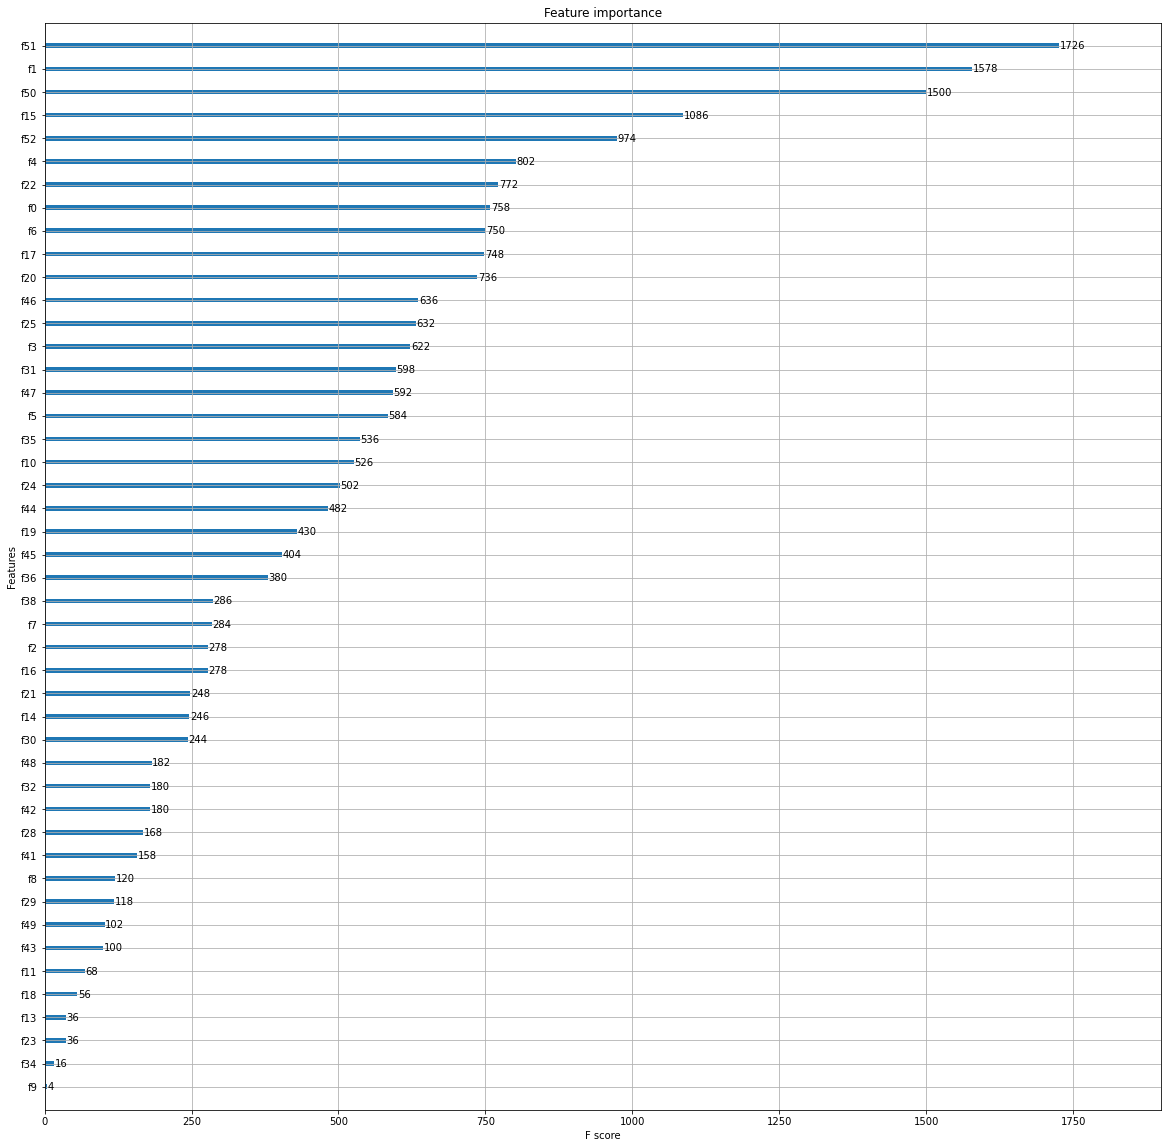

In [21]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X00_train, y00_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X00_train)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y00_train)):
    if ans[i] == y00_train[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

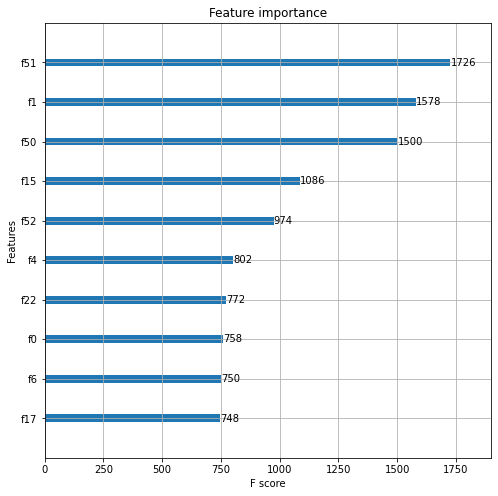

In [22]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
plt.savefig('2OS-1.jpg',dpi=1200)

In [23]:
feat_labels0[[51,1,50,15,52,4,22,0,6,17]]

Index(['cli52', 'cli02', 'cli51', 'cli16', 'cli53', 'cli05', 'cli23', 'cli01',
       'cli07', 'cli18'],
      dtype='object')

Accuracy: 100.00 % 


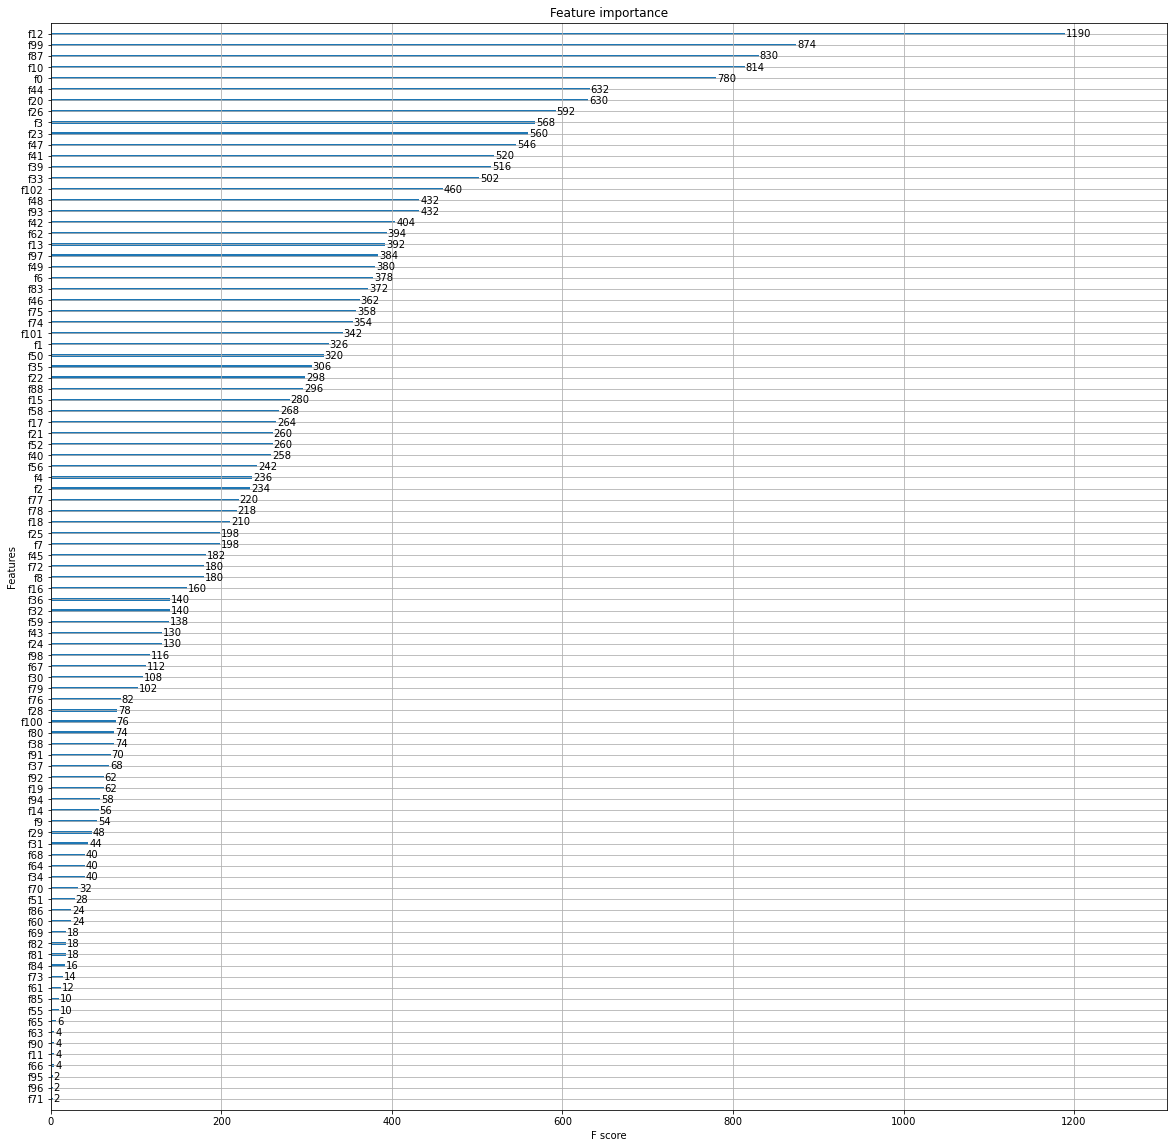

In [24]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X11_train, y11_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X11_train)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y11_train)):
    if ans[i] == y11_train[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

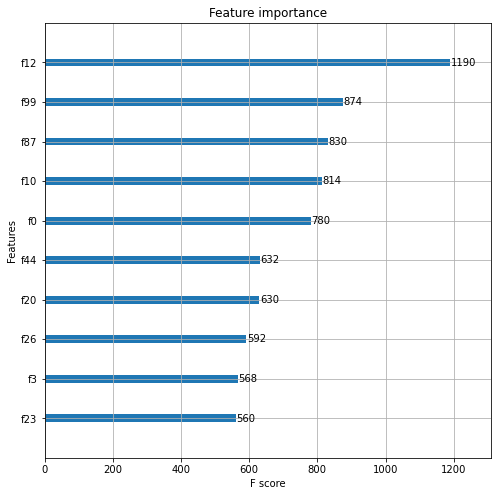

In [25]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
plt.savefig('2OS-2.jpg',dpi=1200)

In [26]:
feat_labels1[[12,99,87,10,0,44,20,26,3,23]]

Index(['original_firstorder_10Percentile', 'original_ngtdm_Coarseness',
       'original_gldm_DependenceVariance', 'original_shape_SurfaceVolumeRatio',
       'original_shape_Elongation', 'original_glcm_Idm',
       'original_firstorder_Mean', 'original_firstorder_Skewness',
       'original_shape_Maximum2DDiameterRow', 'original_firstorder_Range'],
      dtype='object')

In [27]:
X0 = X00_train[:,[51,1,50,15,52,4,22,0,6,17]]
X1 = X11_train[:,[12,99,87,10,0,44,20,26,3,23]]
X2 = X0_test[:,[51,1,50,15,52,4,22,0,6,17]]
X3 = X1_test[:,[12,99,87,10,0,44,20,26,3,23]]
y0 = y00_train
y1 = y11_train
y2 = y_test
y3 = y_test

print("the training clinical data:")
print(X0.shape)
print(y0.shape)
print("the training radiomics data:")
print(X1.shape) #
print(y1.shape)
print("the test clinical data:")
print(X2.shape) #
print(y2.shape)
print("the test radiomics data:")
print(X3.shape) #
print(y3.shape)

the training clinical data:
(550, 10)
(550,)
the training radiomics data:
(550, 10)
(550,)
the test clinical data:
(40, 10)
(40,)
the test radiomics data:
(40, 10)
(40,)


## Select modeling method

In [28]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

### Clinical signature

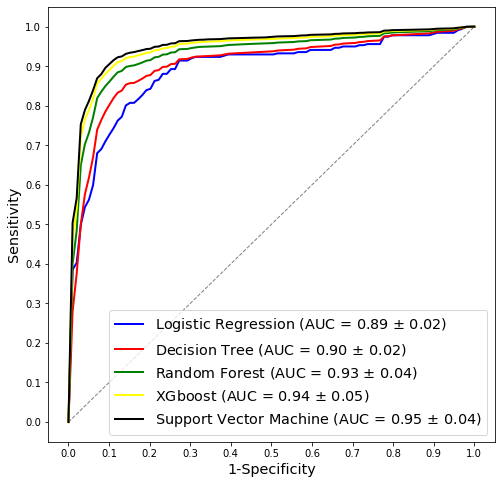

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X0, y0):
    probas_ = clf1.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X0, y0):
    probas_ = clf2.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X0, y0):
    probas_ = clf3.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X0, y0):
    probas_ = clf4.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X0, y0):
    probas_ = clf5.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('2OS-3.jpg',dpi=1200)
plt.show()

### Radiomics signature

In [30]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

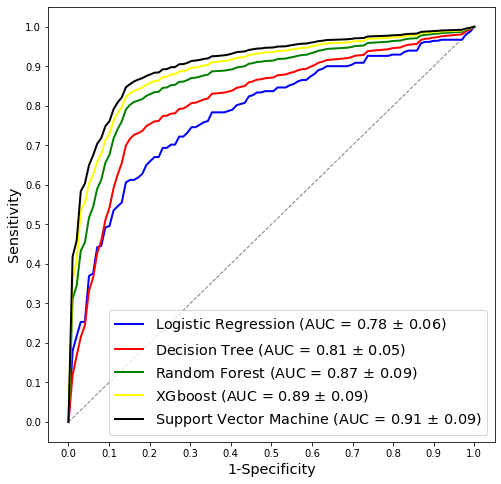

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X1, y1):
    probas_ = clf1.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X1, y1):
    probas_ = clf2.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X1, y1):
    probas_ = clf3.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X1, y1):
    probas_ = clf4.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X1, y1):
    probas_ = clf5.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('2OS-4.jpg',dpi=1200)
plt.show()

## Modeling & Validation

### Clinical Score

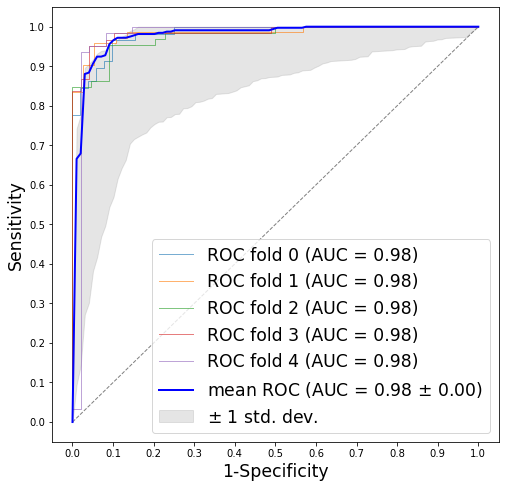

In [32]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X0, y0):
    probas_ = model.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('2OS-5.jpg',dpi=1200)
plt.show()

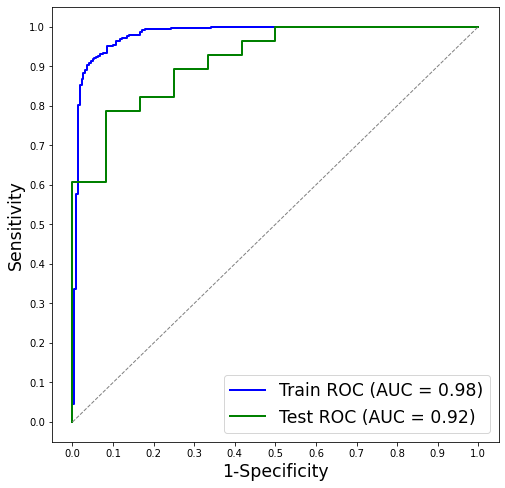

In [33]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X0)
fpr, tpr, thresholds = roc_curve(y0, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X2)
fpr, tpr, thresholds = roc_curve(y2, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
plt.savefig('2OS-5.jpg',dpi=1200)
plt.show()

In [34]:
Y0_Pred = model.predict(X0)
pd.crosstab(pd.Series(Y0_Pred, name = 'Predicted'), 
            pd.Series(df['2yOS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,19,13
1,11,314


In [35]:
Y2_Pred = model.predict(X2)
pd.crosstab(pd.Series(Y2_Pred, name = 'Predicted'), 
            pd.Series(df1['2yOS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,7,2
1,5,26


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y0, Y0_Pred))
print("Precision = " ,precision_score(y0, Y0_Pred))
print("Recall = " ,recall_score(y0, Y0_Pred))
print("F1 Score = " ,f1_score(y0, Y0_Pred))

Accuracy =  0.9327272727272727
Precision =  0.9289940828402367
Recall =  0.9602446483180428
F1 Score =  0.9443609022556391


In [37]:
print("Accuracy = " , accuracy_score(y2, Y2_Pred))
print("Precision = " ,precision_score(y2, Y2_Pred))
print("Recall = " ,recall_score(y2, Y2_Pred))
print("F1 Score = " ,f1_score(y2, Y2_Pred))

Accuracy =  0.825
Precision =  0.8387096774193549
Recall =  0.9285714285714286
F1 Score =  0.8813559322033899


In [38]:
predictions = model.predict_proba(X0)
predictions

array([[0.02392004, 0.97607996],
       [0.09626817, 0.90373183],
       [0.05207852, 0.94792148],
       ...,
       [0.96039673, 0.03960327],
       [0.91036392, 0.08963608],
       [0.97855222, 0.02144778]])

In [39]:
predictions1 = model.predict_proba(X2)
predictions1

array([[0.04214363, 0.95785637],
       [0.06512534, 0.93487466],
       [0.0226156 , 0.9773844 ],
       [0.05526984, 0.94473016],
       [0.02550247, 0.97449753],
       [0.09895594, 0.90104406],
       [0.03900425, 0.96099575],
       [0.03818214, 0.96181786],
       [0.74059206, 0.25940794],
       [0.06600305, 0.93399695],
       [0.15891188, 0.84108812],
       [0.06271778, 0.93728222],
       [0.08144999, 0.91855001],
       [0.05059691, 0.94940309],
       [0.06091642, 0.93908358],
       [0.20839354, 0.79160646],
       [0.05417949, 0.94582051],
       [0.03116651, 0.96883349],
       [0.05378946, 0.94621054],
       [0.01965885, 0.98034115],
       [0.07816537, 0.92183463],
       [0.11363658, 0.88636342],
       [0.92548741, 0.07451259],
       [0.9039508 , 0.0960492 ],
       [0.01754743, 0.98245257],
       [0.08405588, 0.91594412],
       [0.39103715, 0.60896285],
       [0.03911587, 0.96088413],
       [0.0435519 , 0.9564481 ],
       [0.97700245, 0.02299755],
       [0.

In [41]:
# save the data
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('2OS-CSTra.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

In [42]:
pre_df = pd.DataFrame(predictions1)
writer = pd.ExcelWriter('2OS-CSTest.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

### Radiomic Score

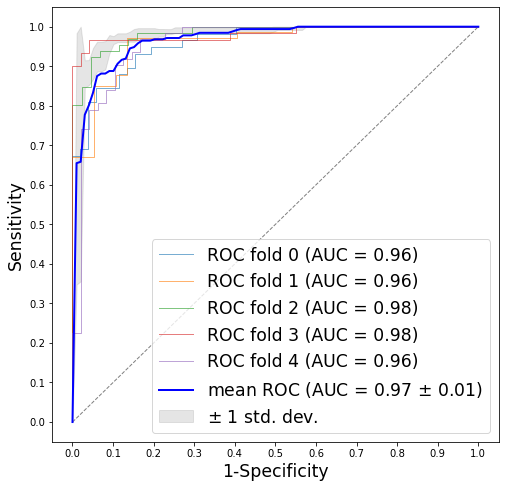

In [43]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X1, y1):
    probas_ = model.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('2OS-5.jpg',dpi=1200)
plt.show()

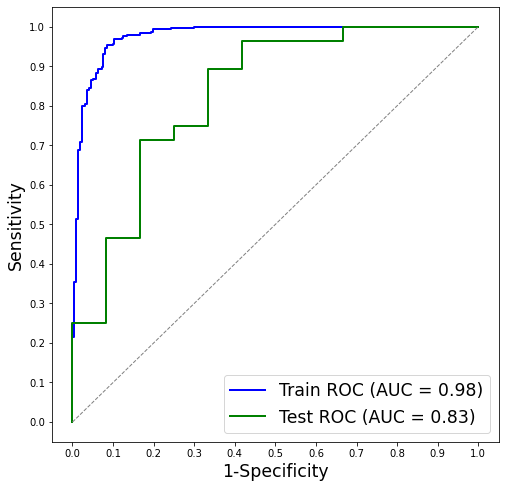

In [44]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
plt.savefig('2OS-6.jpg',dpi=1200)
plt.show()

In [45]:
Y1_Pred = model.predict(X1)
pd.crosstab(pd.Series(Y1_Pred, name = 'Predicted'), 
            pd.Series(df['2yOS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,21,23
1,9,304


In [46]:
Y3_Pred = model.predict(X3)
pd.crosstab(pd.Series(Y3_Pred, name = 'Predicted'), 
            pd.Series(df1['2yOS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,7,2
1,5,26


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y1, Y1_Pred))
print("Precision = " ,precision_score(y1, Y1_Pred))
print("Recall = " ,recall_score(y1, Y1_Pred))
print("F1 Score = " ,f1_score(y1, Y1_Pred))

Accuracy =  0.9272727272727272
Precision =  0.9470404984423676
Recall =  0.9296636085626911
F1 Score =  0.9382716049382716


In [48]:
print("Accuracy = " , accuracy_score(y3, Y3_Pred))
print("Precision = " ,precision_score(y3, Y3_Pred))
print("Recall = " ,recall_score(y3, Y3_Pred))
print("F1 Score = " ,f1_score(y3, Y3_Pred))

Accuracy =  0.825
Precision =  0.8387096774193549
Recall =  0.9285714285714286
F1 Score =  0.8813559322033899


In [49]:
predictions = model.predict_proba(X1)
predictions

array([[0.03419041, 0.96580959],
       [0.45778817, 0.54221183],
       [0.05047147, 0.94952853],
       ...,
       [0.94566552, 0.05433448],
       [0.81875051, 0.18124949],
       [0.70900971, 0.29099029]])

In [50]:
predictions1 = model.predict_proba(X3)
predictions1

array([[0.00880093, 0.99119907],
       [0.02870381, 0.97129619],
       [0.0127315 , 0.9872685 ],
       [0.02915692, 0.97084308],
       [0.06068307, 0.93931693],
       [0.92000637, 0.07999363],
       [0.30245144, 0.69754856],
       [0.01030144, 0.98969856],
       [0.02602448, 0.97397552],
       [0.02349588, 0.97650412],
       [0.61858683, 0.38141317],
       [0.01115131, 0.98884869],
       [0.01399161, 0.98600839],
       [0.20657845, 0.79342155],
       [0.16619726, 0.83380274],
       [0.37360277, 0.62639723],
       [0.03725961, 0.96274039],
       [0.21306192, 0.78693808],
       [0.01864897, 0.98135103],
       [0.19268526, 0.80731474],
       [0.04394792, 0.95605208],
       [0.91553098, 0.08446902],
       [0.34360411, 0.65639589],
       [0.0439378 , 0.9560622 ],
       [0.04398184, 0.95601816],
       [0.91022878, 0.08977122],
       [0.91378219, 0.08621781],
       [0.03791452, 0.96208548],
       [0.04079715, 0.95920285],
       [0.93217004, 0.06782996],
       [0.

In [51]:
# save the data
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('2OS-RTra.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

In [52]:
pre_df = pd.DataFrame(predictions1)
writer = pd.ExcelWriter('2OS-RTest.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 